In [1]:
import logging
logging.basicConfig(level=logging.INFO)

# ACS-ACS2
Notatnik przedstawiający użycie algorytmów ACS i ACS2 dla przykładowego problemu Maze

## Środowisko

In [2]:
import gym
import gym_maze

In [3]:
# Listowanie dostępnych środowisk
filter_envs = lambda env: env.id.startswith("Maze") or env.id.startswith("Woods")

all_envs = [env for env in gym.envs.registry.all()]
maze_envs = [env for env in all_envs if filter_envs(env)]

for env in maze_envs:
    print("Maze ID: [{}], non-deterministic: [{}], trials: [{}]".format(
            env.id, env.nondeterministic, env.trials))

Maze ID: [MazeF1-v0], non-deterministic: [False], trials: [100]
Maze ID: [MazeF2-v0], non-deterministic: [False], trials: [100]
Maze ID: [MazeF3-v0], non-deterministic: [False], trials: [100]
Maze ID: [MazeF4-v0], non-deterministic: [True], trials: [100]
Maze ID: [Maze4-v0], non-deterministic: [False], trials: [100]
Maze ID: [Maze5-v0], non-deterministic: [False], trials: [100]
Maze ID: [Maze6-v0], non-deterministic: [True], trials: [100]
Maze ID: [MazeT2-v0], non-deterministic: [False], trials: [100]
Maze ID: [MazeT3-v0], non-deterministic: [False], trials: [100]
Maze ID: [MazeT4-v0], non-deterministic: [True], trials: [100]
Maze ID: [Woods1-v0], non-deterministic: [False], trials: [100]
Maze ID: [Woods14-v0], non-deterministic: [False], trials: [100]


In [4]:
# Użycie przykładowego środowika
MAZE = "MazeF1-v0"

maze = gym.make(MAZE)
situation = maze.reset()

maze.render()


■ ■ ■ ■
■ A $ ■
■ □ ■ ■
■ □ □ ■
■ □ ■ ■
■ ■ ■ ■


In [5]:
# przykład zwracanej percepcji (używana przez agenta)
situation 

('1', '1', '9', '1', '0', '1', '1', '1')

## Algorytmy
Każdy algorytm ma swój obiekt konfiguracji który pozwala dostosować go do wybranego środowiska, określić parametry, zdefiniować własne metryki itp.

Domyślne metryki to liczba kroków w trialu oraz ostateczna nagroda.

In [6]:
import lcs.agents.acs as acs
import lcs.agents.acs2 as acs2

### ACS

In [7]:
acs_cfg = acs.Configuration(8, 8, epsilon=0.9, metrics_trial_frequency=5)
acs_agent = acs.ACS(acs_cfg)

In [19]:
# eksploracja
acs_population, acs_explore_metrics = acs_agent.explore(maze, 500)

INFO:lcs.agents.Agent:{'trial': 0, 'steps_in_trial': 34, 'reward': 1000}
INFO:lcs.agents.Agent:{'trial': 50, 'steps_in_trial': 1, 'reward': 1000}
INFO:lcs.agents.Agent:{'trial': 100, 'steps_in_trial': 12, 'reward': 1000}
INFO:lcs.agents.Agent:{'trial': 150, 'steps_in_trial': 3, 'reward': 1000}
INFO:lcs.agents.Agent:{'trial': 200, 'steps_in_trial': 47, 'reward': 1000}
INFO:lcs.agents.Agent:{'trial': 250, 'steps_in_trial': 11, 'reward': 1000}
INFO:lcs.agents.Agent:{'trial': 300, 'steps_in_trial': 5, 'reward': 1000}
INFO:lcs.agents.Agent:{'trial': 350, 'steps_in_trial': 10, 'reward': 1000}
INFO:lcs.agents.Agent:{'trial': 400, 'steps_in_trial': 11, 'reward': 1000}
INFO:lcs.agents.Agent:{'trial': 450, 'steps_in_trial': 25, 'reward': 1000}


In [20]:
# przykład populacji (quality - reward - fitness)
for cl in sorted(acs_population, key=lambda c: -c.fitness)[:20]:
    print(cl)

#101#### 0 #910#### (empty)               q: 1.0   r: 414.2  f: 414.2 
0910#### 0 1191#### (empty)               q: 1.0   r: 407.1  f: 407.1 
11#11000 7 09#00111 (empty)               q: 1.0   r: 383.2  f: 383.2 
00###111 1 11###000 (empty)               q: 1.0   r: 298.7  f: 298.7 
1191#### 4 0910#### (empty)               q: 1.0   r: 291.9  f: 291.9 
#01#1### 0 #10#0### (empty)               q: 1.0   r: 290.8  f: 290.8 
11###000 5 00###111 (empty)               q: 1.0   r: 286.7  f: 286.7 
1#1#1000 6 0#0#0111 (empty)               q: 1.0   r: 286.3  f: 286.3 
#10#0### 4 #01#1### (empty)               q: 1.0   r: 283.5  f: 283.5 
0#0#0111 2 1#1#1000 (empty)               q: 1.0   r: 279.5  f: 279.5 
#910#### 4 #101#### (empty)               q: 1.0   r: 254.2  f: 254.2 
09#00111 3 11#11000 (empty)               q: 1.0   r: 240.7  f: 240.7 
09#0011# 1 11#1100# (empty)               q: 1.0   r: 0.5    f: 0.5   
##9#011# 2 ##1#100# (empty)               q: 1.0   r: 0.5    f: 0.5   
######

### ACS2

In [12]:
acs2_cfg = acs2.Configuration(8, 8, epsilon=0.9, metrics_trial_frequency=5)
acs2_agent = acs2.ACS2(acs2_cfg)

In [14]:
# eksploracja
acs2_population, acs2_explore_metrics = acs2_agent.explore(maze, 500)

INFO:lcs.agents.Agent:{'trial': 0, 'steps_in_trial': 9, 'reward': 1000}
INFO:lcs.agents.Agent:{'trial': 50, 'steps_in_trial': 50, 'reward': 0}
INFO:lcs.agents.Agent:{'trial': 100, 'steps_in_trial': 45, 'reward': 1000}
INFO:lcs.agents.Agent:{'trial': 150, 'steps_in_trial': 9, 'reward': 1000}
INFO:lcs.agents.Agent:{'trial': 200, 'steps_in_trial': 3, 'reward': 1000}
INFO:lcs.agents.Agent:{'trial': 250, 'steps_in_trial': 50, 'reward': 0}
INFO:lcs.agents.Agent:{'trial': 300, 'steps_in_trial': 3, 'reward': 1000}
INFO:lcs.agents.Agent:{'trial': 350, 'steps_in_trial': 4, 'reward': 1000}
INFO:lcs.agents.Agent:{'trial': 400, 'steps_in_trial': 41, 'reward': 1000}
INFO:lcs.agents.Agent:{'trial': 450, 'steps_in_trial': 29, 'reward': 1000}


In [16]:
# przykład populacji (quality - reward - fitness)
for cl in sorted(acs2_population, key=lambda c: -c.fitness)[:20]:
    print(cl)

09#0011# 1 11#1100#         (empty)               q: 1.0   r: 1e+03  ir: 1e+03  f: 1e+03  exp: 475 tga: 8     talp: 11924 tav: 54.1   num: 1
##9#011# 2 ##1#100#         (empty)               q: 1.0   r: 1e+03  ir: 1e+03  f: 1e+03  exp: 330 tga: 79    talp: 11922 tav: 67.1   num: 1
###0#### 2 ########         (empty)               q: 1.0   r: 950.0  ir: 1.694e-09 f: 950.0  exp: 490 tga: 189   talp: 11908 tav: 44.1   num: 1
#9###### 2 ########         (empty)               q: 1.0   r: 950.0  ir: 1.95e-09 f: 950.0  exp: 485 tga: 267   talp: 11908 tav: 44.1   num: 1
##9##### 3 ########         (empty)               q: 1.0   r: 950.0  ir: 0.0    f: 950.0  exp: 343 tga: 79    talp: 11906 tav: 56.0   num: 1
##9##### 5 ########         (empty)               q: 1.0   r: 950.0  ir: 0.0    f: 950.0  exp: 344 tga: 365   talp: 11921 tav: 56.1   num: 1
###0#### 7 ########         (empty)               q: 1.0   r: 949.9  ir: 0.0    f: 949.9  exp: 480 tga: 72    talp: 11811 tav: 54.7   num: 1
#101####

## Eksploitacja

In [25]:
# Agent może zostać zainicjalizowany z początkowową wiedzą
acs_exploiter_agent = acs.ACS(acs_cfg, acs_population)

# A potem użyty w następujący sposób
acs_exploit_population, acs_exploit_metrics = acs_exploiter_agent.exploit(maze, 50)

INFO:lcs.agents.Agent:{'trial': 0, 'steps_in_trial': 50, 'reward': 0}
INFO:lcs.agents.Agent:{'trial': 5, 'steps_in_trial': 50, 'reward': 0}
INFO:lcs.agents.Agent:{'trial': 10, 'steps_in_trial': 50, 'reward': 0}
INFO:lcs.agents.Agent:{'trial': 15, 'steps_in_trial': 50, 'reward': 0}
INFO:lcs.agents.Agent:{'trial': 20, 'steps_in_trial': 50, 'reward': 0}
INFO:lcs.agents.Agent:{'trial': 25, 'steps_in_trial': 50, 'reward': 0}
INFO:lcs.agents.Agent:{'trial': 30, 'steps_in_trial': 50, 'reward': 0}
INFO:lcs.agents.Agent:{'trial': 35, 'steps_in_trial': 50, 'reward': 0}
INFO:lcs.agents.Agent:{'trial': 40, 'steps_in_trial': 50, 'reward': 0}
INFO:lcs.agents.Agent:{'trial': 45, 'steps_in_trial': 50, 'reward': 0}


## Własne metryki

Zdefiniowanie własnej metryki - np. aktualny rozmiar populacji w danym trialu

In [27]:
# własna funkcja która jako argument zawiera aktualną populację klasyfikatorów oraz testowane środowisko
# zwraca słownik - możliwośc użycia wielu metryk
def custom_metrics(population, environment):
    return {
        'population': len(population),
    }

In [30]:
# metrykę należy umieścic w obiekcie konfiguracji agenta, np.
acs2_cfg = acs2.Configuration(8, 8,
                              epsilon=0.9,
                              user_metrics_collector_fcn=custom_metrics,
                              metrics_trial_frequency=1)

# ponowna inicjalizacja
acs2_agent = acs2.ACS2(acs2_cfg)

# i uruchomienie
acs2_population, acs2_explore_metrics = acs2_agent.explore(maze, 500)

INFO:lcs.agents.Agent:{'trial': 0, 'steps_in_trial': 5, 'reward': 1000, 'population': 4}
INFO:lcs.agents.Agent:{'trial': 50, 'steps_in_trial': 12, 'reward': 1000, 'population': 84}
INFO:lcs.agents.Agent:{'trial': 100, 'steps_in_trial': 2, 'reward': 1000, 'population': 85}
INFO:lcs.agents.Agent:{'trial': 150, 'steps_in_trial': 2, 'reward': 1000, 'population': 83}
INFO:lcs.agents.Agent:{'trial': 200, 'steps_in_trial': 5, 'reward': 1000, 'population': 83}
INFO:lcs.agents.Agent:{'trial': 250, 'steps_in_trial': 1, 'reward': 1000, 'population': 83}
INFO:lcs.agents.Agent:{'trial': 300, 'steps_in_trial': 1, 'reward': 1000, 'population': 83}
INFO:lcs.agents.Agent:{'trial': 350, 'steps_in_trial': 13, 'reward': 1000, 'population': 83}
INFO:lcs.agents.Agent:{'trial': 400, 'steps_in_trial': 4, 'reward': 1000, 'population': 83}
INFO:lcs.agents.Agent:{'trial': 450, 'steps_in_trial': 1, 'reward': 1000, 'population': 83}


Metryki zbierane są z określoną częstotliwością (w konfiguracji). Są obiektem typu słownik który da się łatwo przetwarzać.

In [34]:
import pandas as pd

df = pd.DataFrame(acs2_explore_metrics)
df.set_index('trial', inplace=True)

df.head()

,steps_in_trial,reward,population
trial,,,
0,5,1000,4
1,1,1000,5
2,4,1000,7
3,6,1000,9
4,5,1000,9


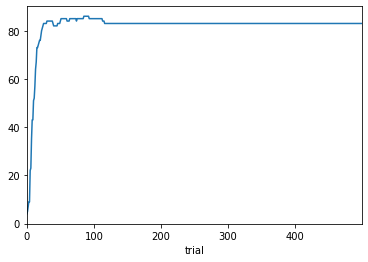

In [36]:
df['population'].plot();